<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Introduction </h1></div>



![](https://www.ceres.org/sites/default/files/2020-09/Future%20water%20banner%20%281%29.png)
#### [Image Source](https://www.ceres.org/sites/default/files/2020-09/Future%20water%20banner%20%281%29.png)

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<p style="text-align:center;"> Water quality is one amongst the foremost important factors in a healthy ecosystem. Clean water supports various plants and wildlife. Though it's going to seem unrelated initially , our actions ashore affect the standard of our water. Pollutants,from fertilizers, and sediment frequently get carried into lakes and rivers via runoff from urban areas or agricultural fields.  </p>
</div>



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Importing Libraries </h1>
</div>


<div style="color:white;
           display:fill;
           border-radius:15px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold">LuciferML</h1>
    <h3 style="text-align:center;font-weight: bold">This is my own ML-Library whose purpose is to take away all your hassles and does all the hard work for you. It's currently in development stage. Preprocesses and Trains different models on your Data. More about LuciferML <a href="https://github.com/d4rk-lucif3r/LuciferML">here</a></h3>


</div>

In [1]:
pip install lucifer-ml

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook

## Importing LuciferML
from luciferml.supervised.classification import Classification
from luciferml.preprocessing import Preprocess as prep

import warnings
warnings.simplefilter(action='ignore', category=Warning)


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Importing Dataset </h1>
</div>


In [3]:
dataset = pd.read_csv('../input/water-potability/water_potability.csv')


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Exploratory Data Analysis </h1>
</div>


In [4]:
dataset.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
dataset.shape

(3276, 10)

In [6]:
dataset.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

In [7]:
dataset.isnull().values.any()

True

In [8]:
dataset.dropna(inplace =True)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Countplot for Potability</h2>
</div>


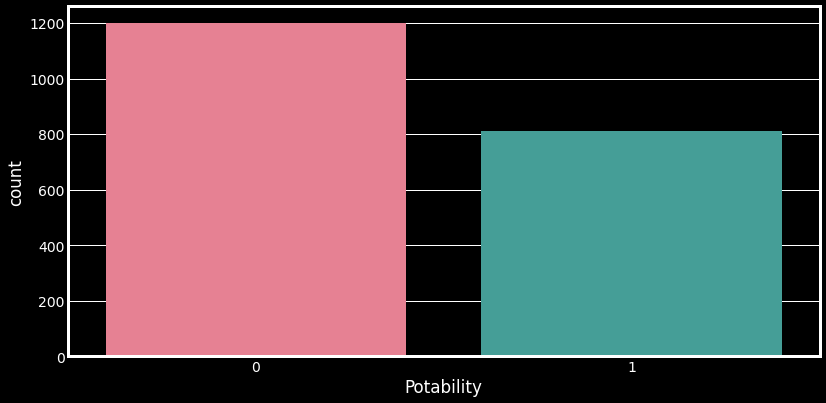

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability", data=dataset, palette='husl');

In [10]:
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Some Box Plots</h2>
</div>


Your Charts are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

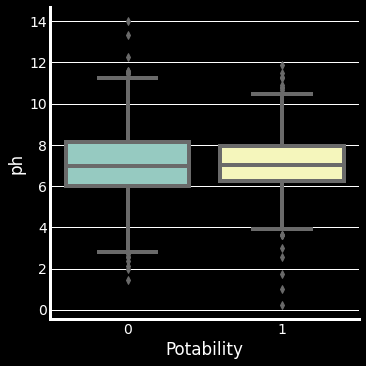

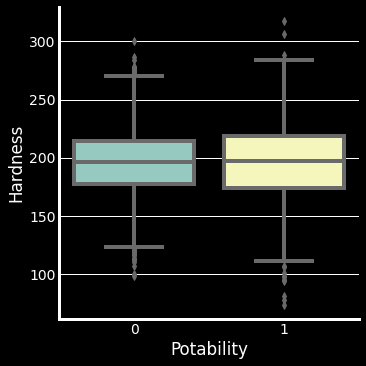

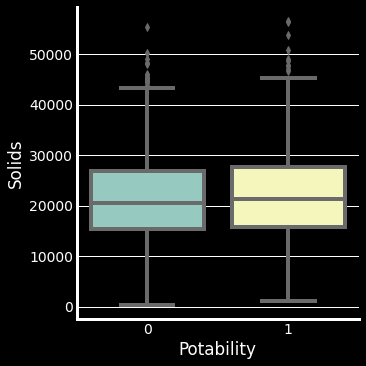

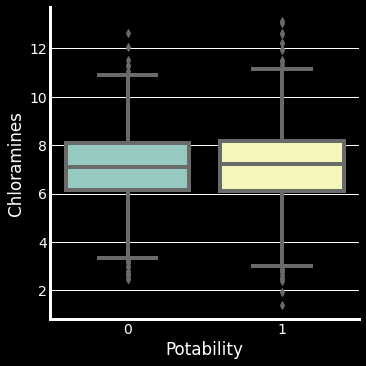

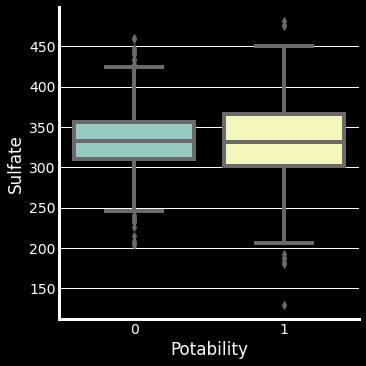

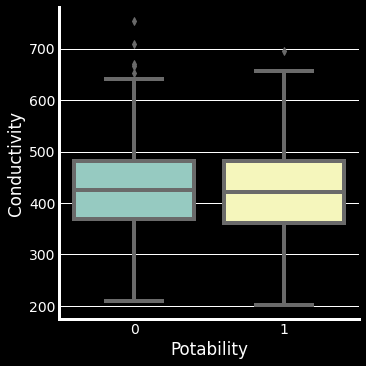

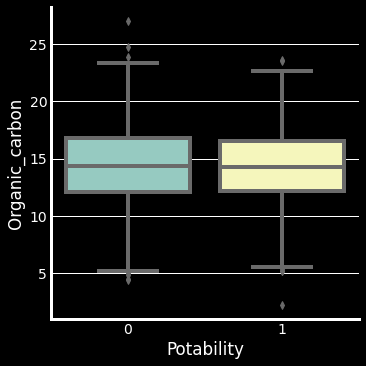

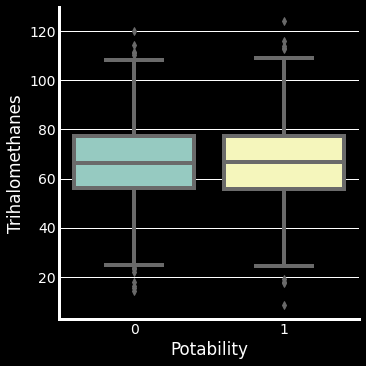

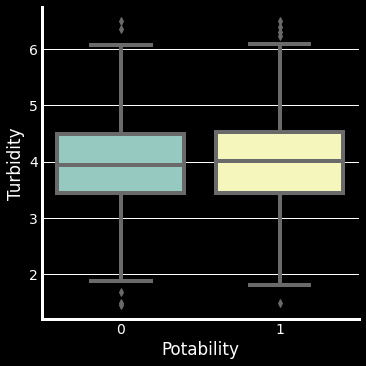

In [11]:
def boxPlotter(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="Potability", y=columnName, data=dataset, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    boxPlotter(dataset, column)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Pie Chart</h2>
</div>



In [12]:
def pieChartPlotter(dataset, columnName):
    """
    Creates pie chart of the column given as parameter in the dataset
    """
    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,explode=[0.06]*dataset[columnName].unique()
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

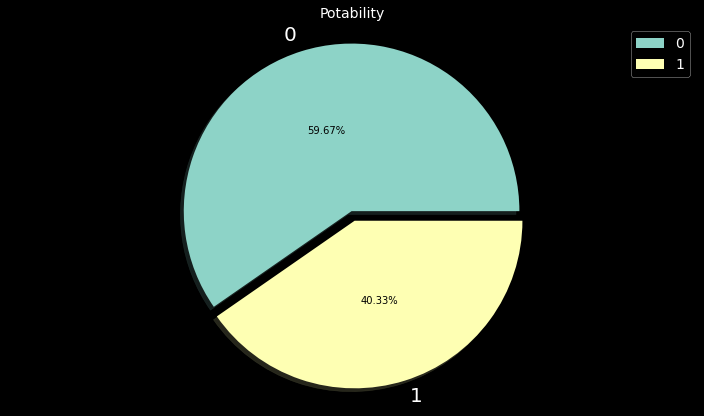

In [13]:
pieChartPlotter(dataset, 'Potability') 



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Correlation Plot</h2>
</div>

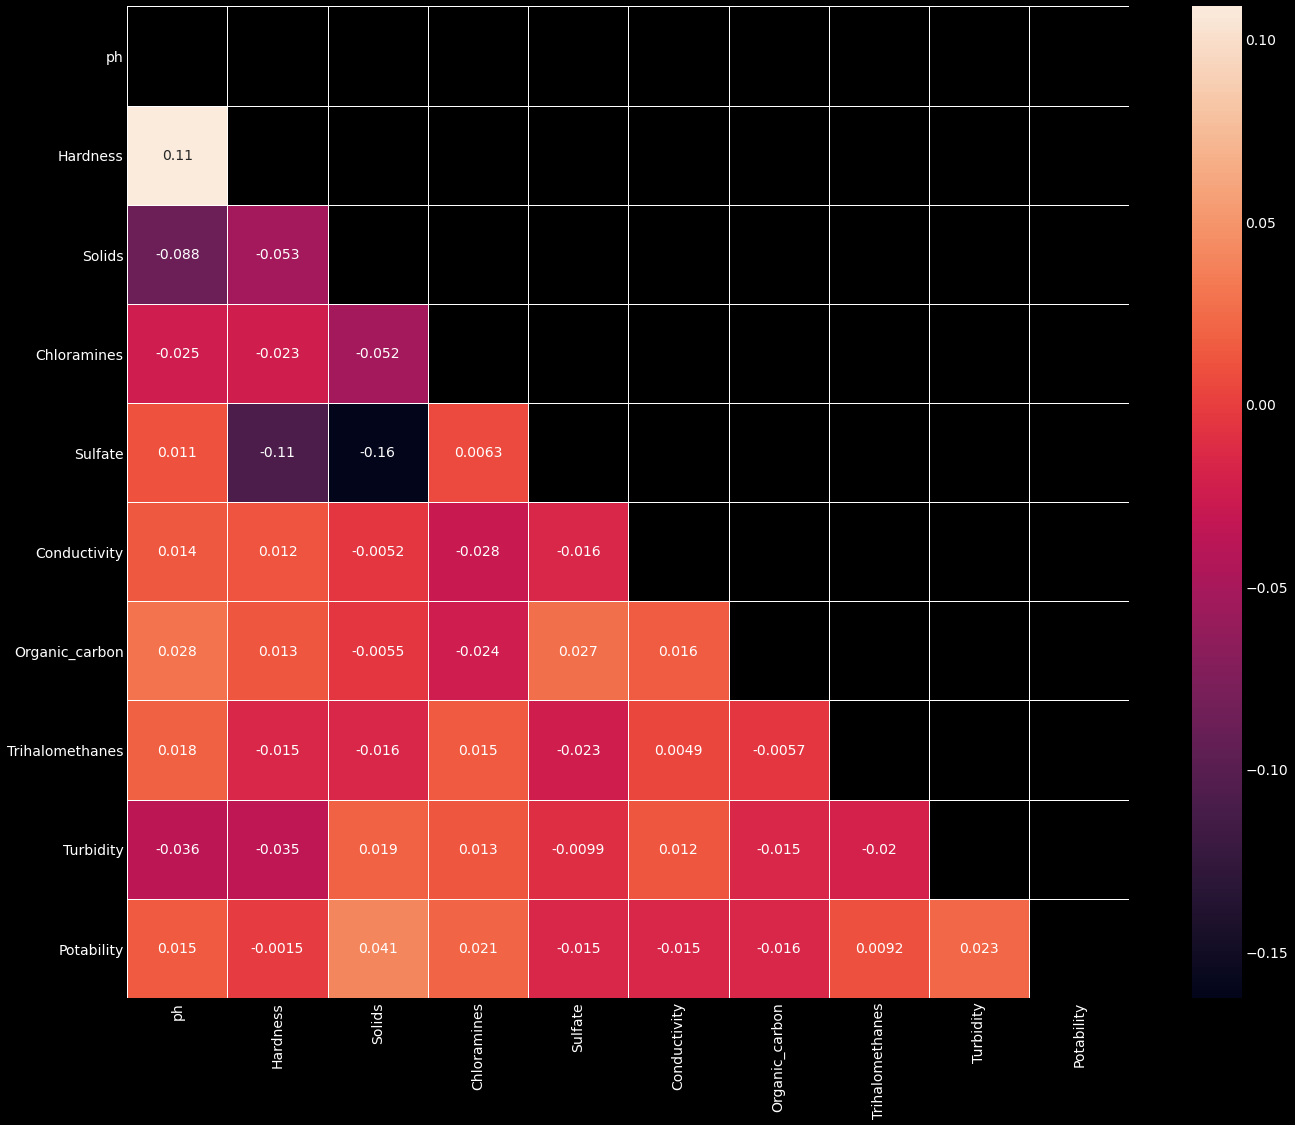

In [14]:
plt.figure(figsize=(20, 17))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Some Distribution Plots</h2>
</div>


In [15]:
def distributionPlot(dataset):
    """ 
    Creates distribution plot.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(dataset.columns)), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(dataset.columns)/3), 3, i+1)
        sns.distplot(
            dataset.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

In [16]:
plot_data = dataset.drop(['Potability'], axis =1)

Your plots are being ready:   0%|          | 0/9 [00:00<?, ?it/s]

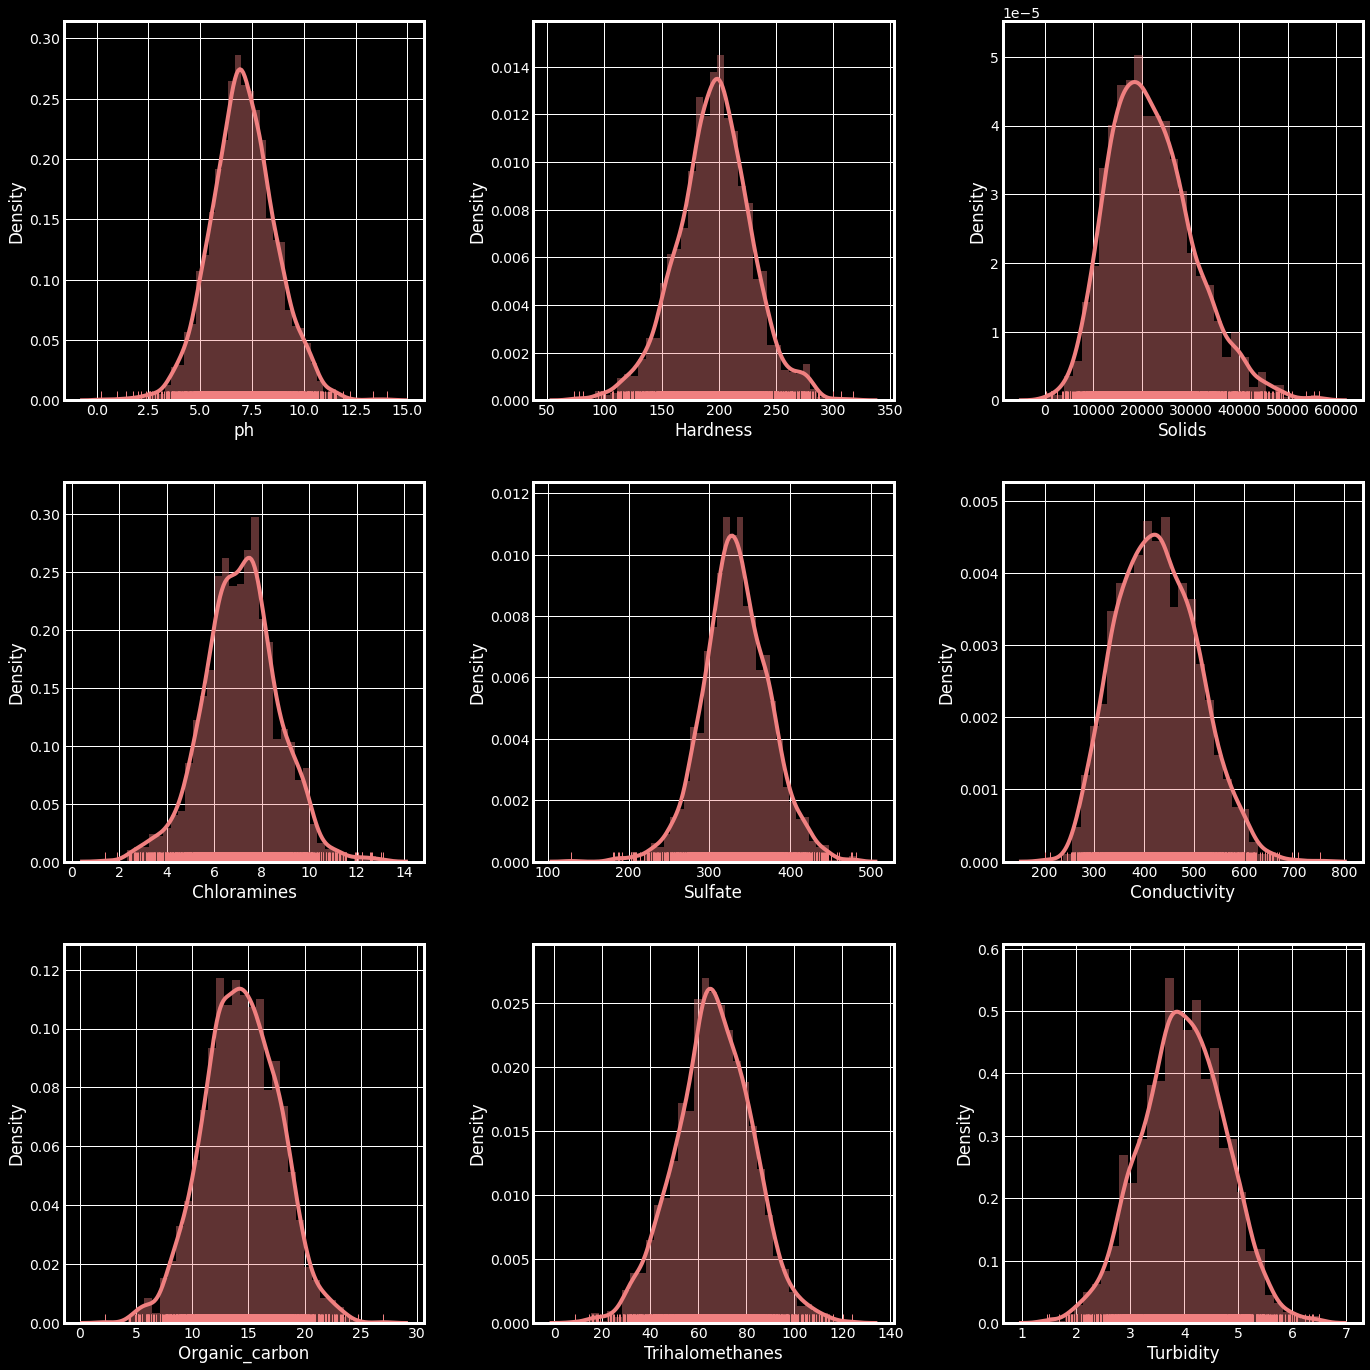

In [17]:
distributionPlot(plot_data)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Pairplots</h2>
</div>



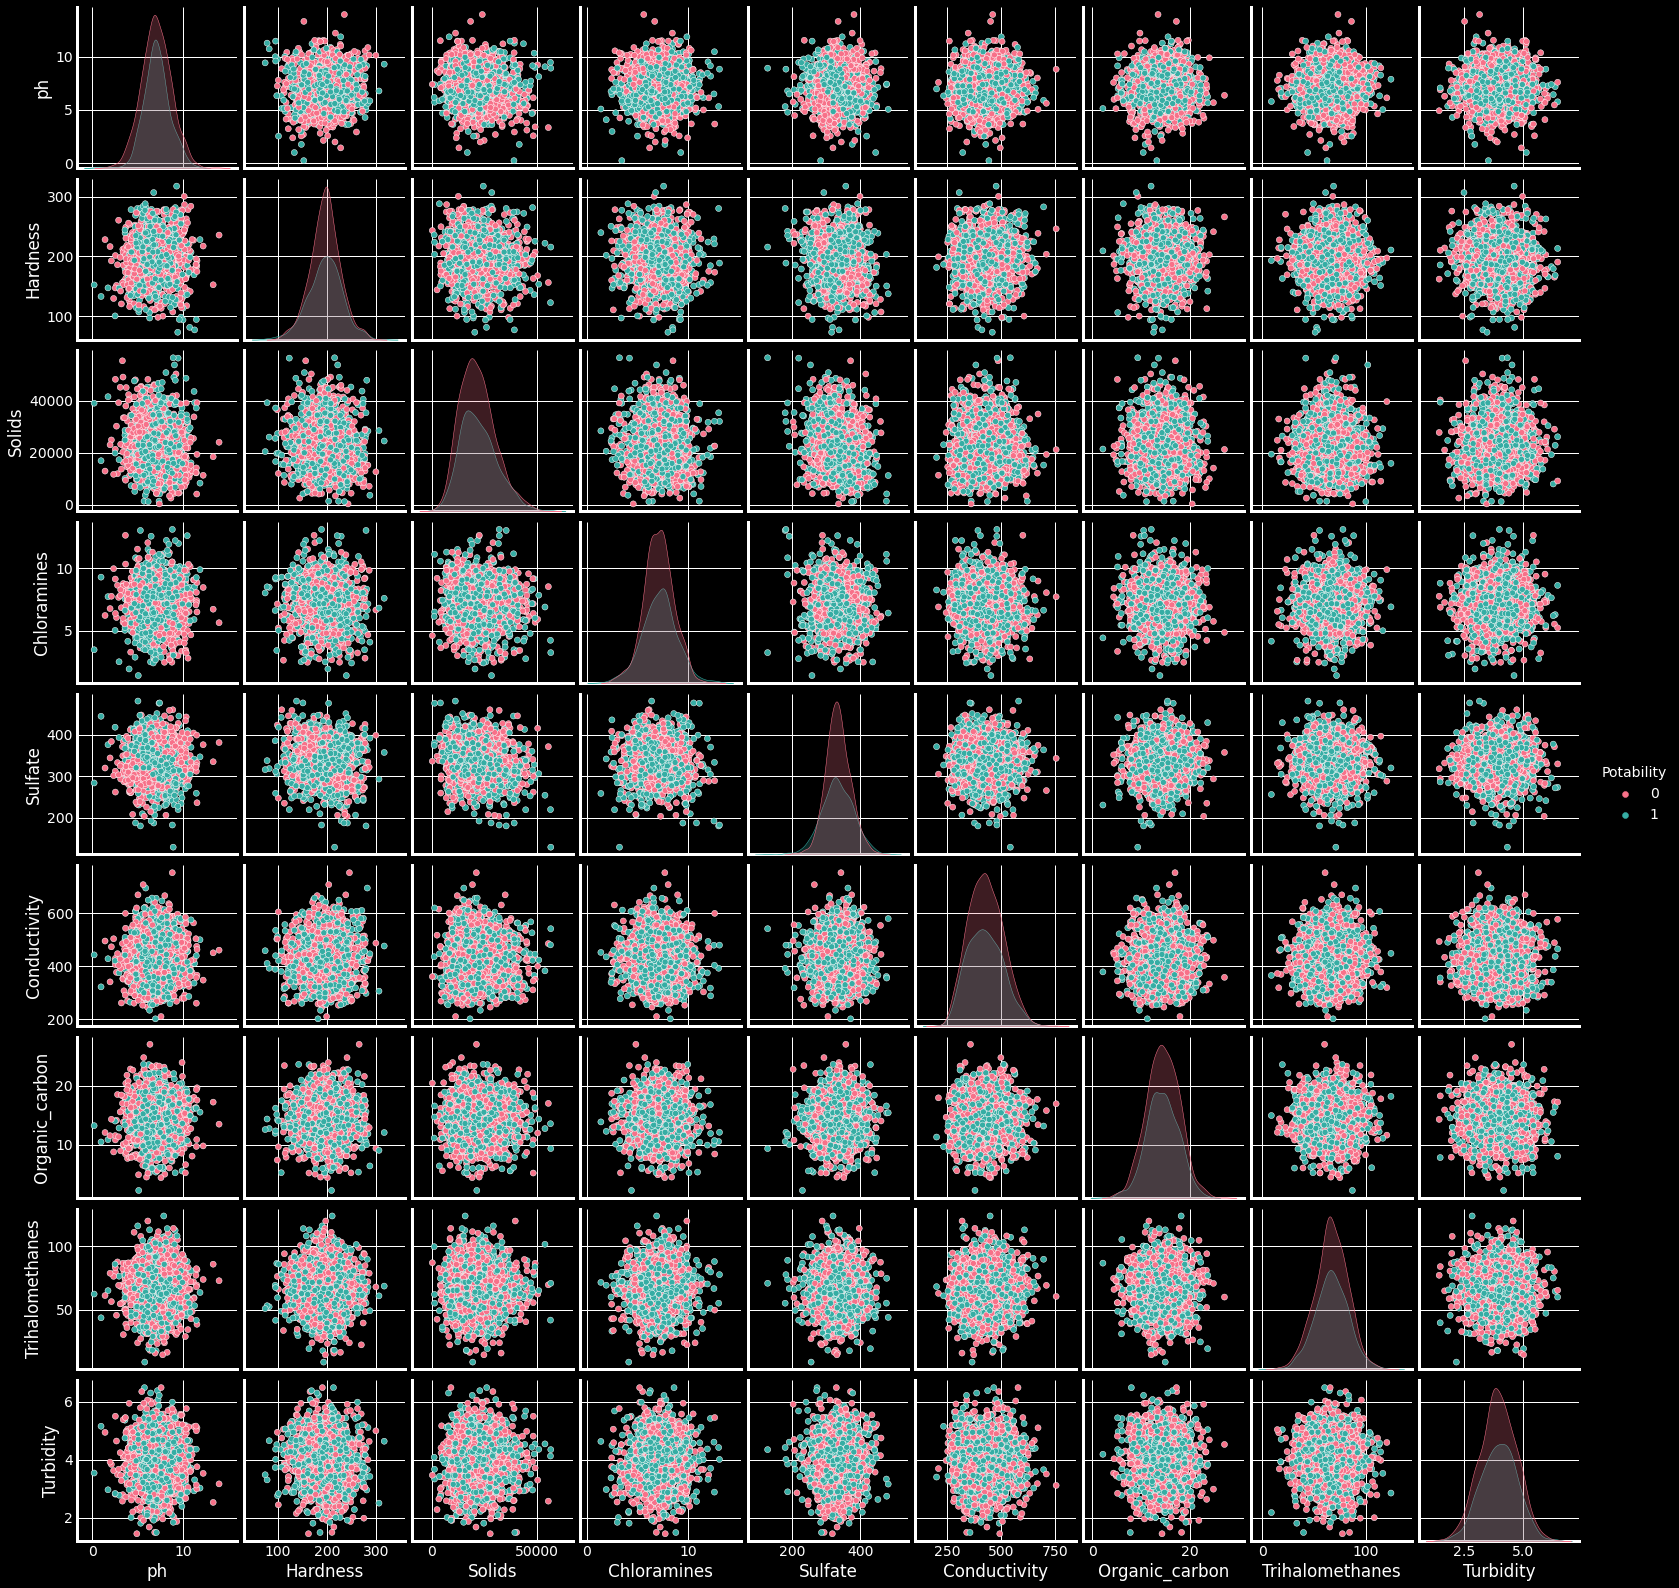

In [18]:
sns.pairplot(dataset, hue="Potability", palette="husl");

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h4 style="text-align:left;">From above charts we can confirm</h4>
<p style="text-align:left;">1) There seems to be very less correlation between all the features.
    <br>
2) 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity' columns are skewed. So, lets correct it</p>
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight:bold">Data Preprocessing</h1>
</div>





<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Skewness Correction</h2>
</div>




          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started Preprocessor 


Skewness in numerical features: 

                 Skewness
Solids           0.595449
Conductivity     0.266670
ph               0.048910
Chloramines      0.012967
Organic_carbon  -0.020003
Turbidity       -0.033027
Sulfate         -0.046523
Trihalomethanes -0.051384
Hardness        -0.085174
Skewness Before Transformation for Solids:  0.5958940107371647 

Mean before Transformation for Solids : 21917.441374490332, Standard Deviation before Transformation for Solids : 8640.090806098791 



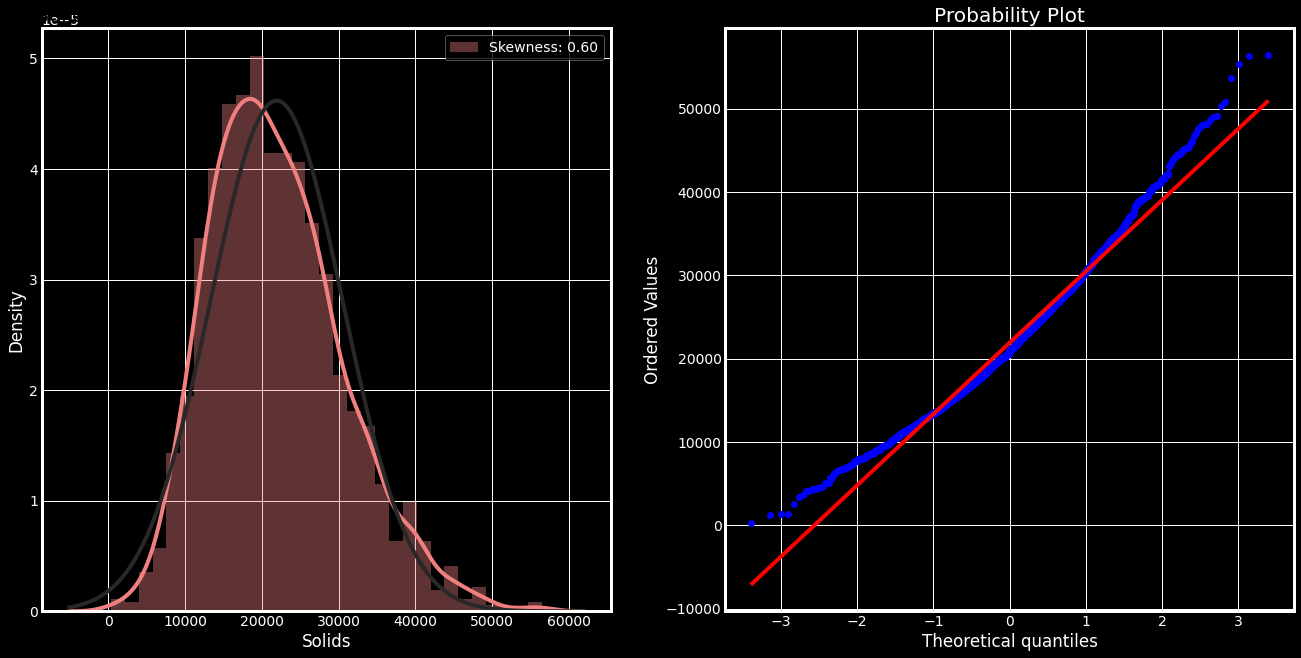

Skewness After Transformation for Solids:  -1.2308145151482406 

Mean before Transformation for Solids : 9.908982178445935, Standard Deviation before Transformation for Solids : 0.4428466687614959 



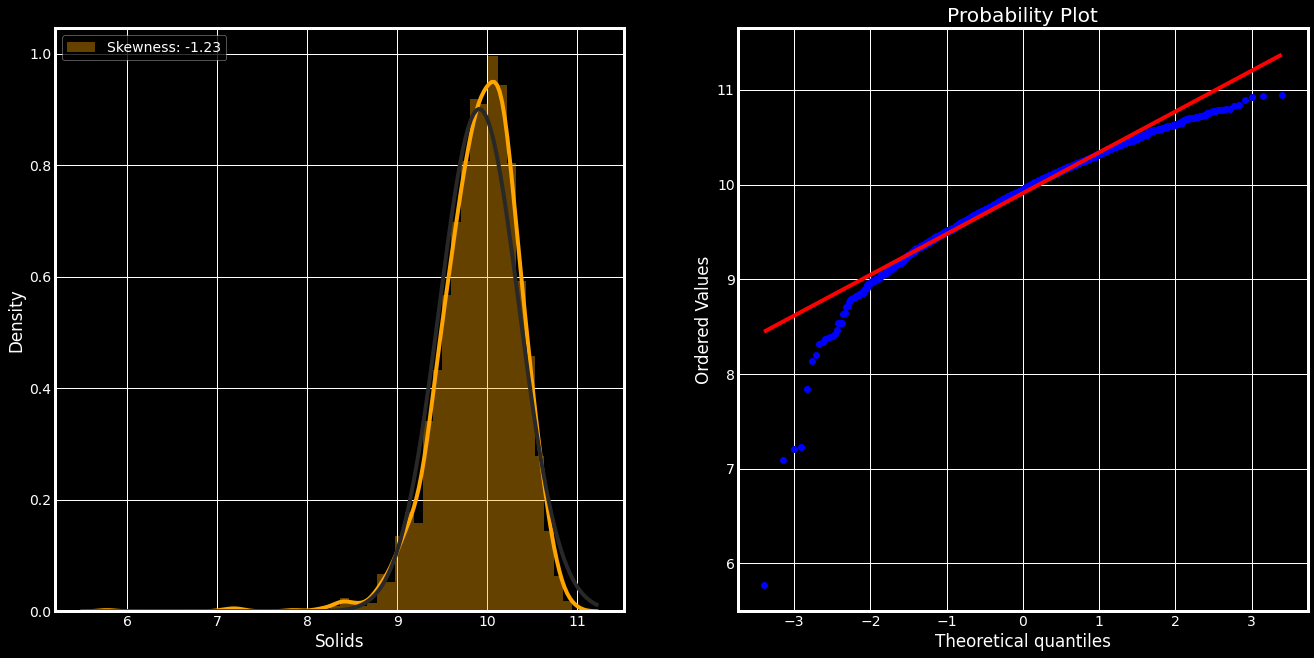

Skewness Before Transformation for Conductivity:  0.2668688266945701 

Mean before Transformation for Conductivity : 426.5264087317783, Standard Deviation before Transformation for Conductivity : 80.69250214345881 



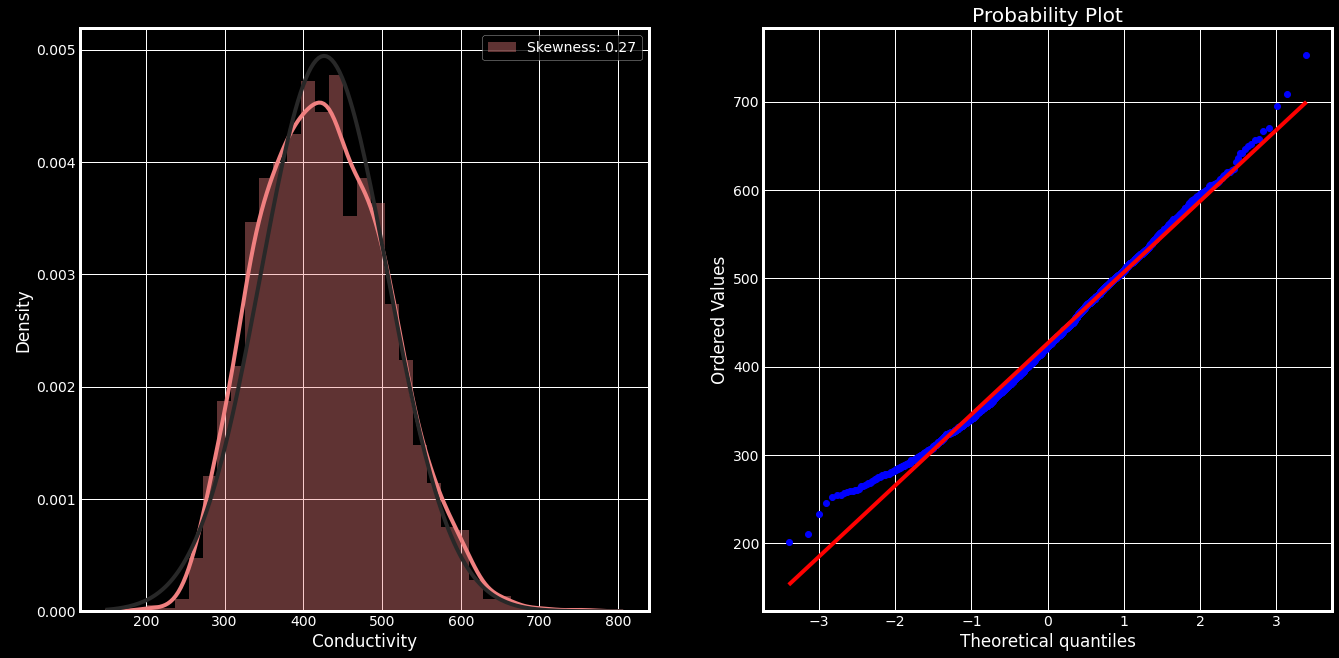

Skewness After Transformation for Conductivity:  -0.19929597288588355 

Mean before Transformation for Conductivity : 6.03995949808105, Standard Deviation before Transformation for Conductivity : 0.19133953254702343 



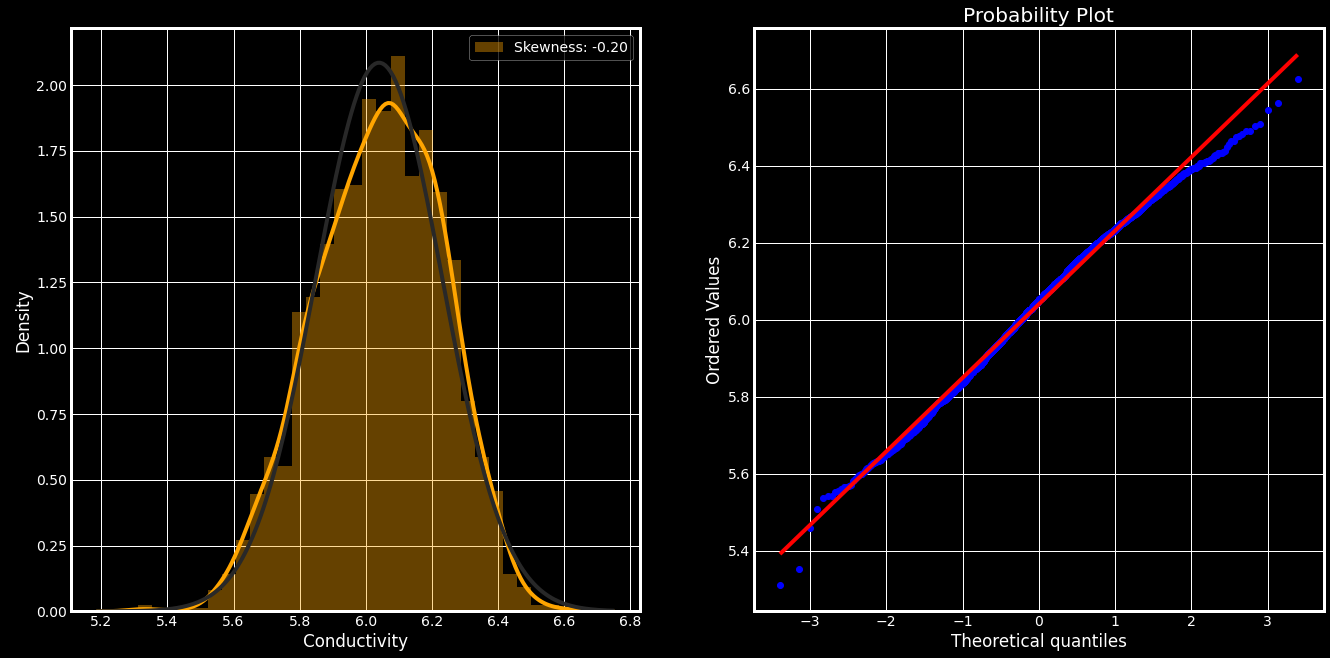

Skewness Before Transformation for ph:  0.04894678355193392 

Mean before Transformation for Ph : 7.085989839285033, Standard Deviation before Transformation for Ph : 1.5729454793216593 



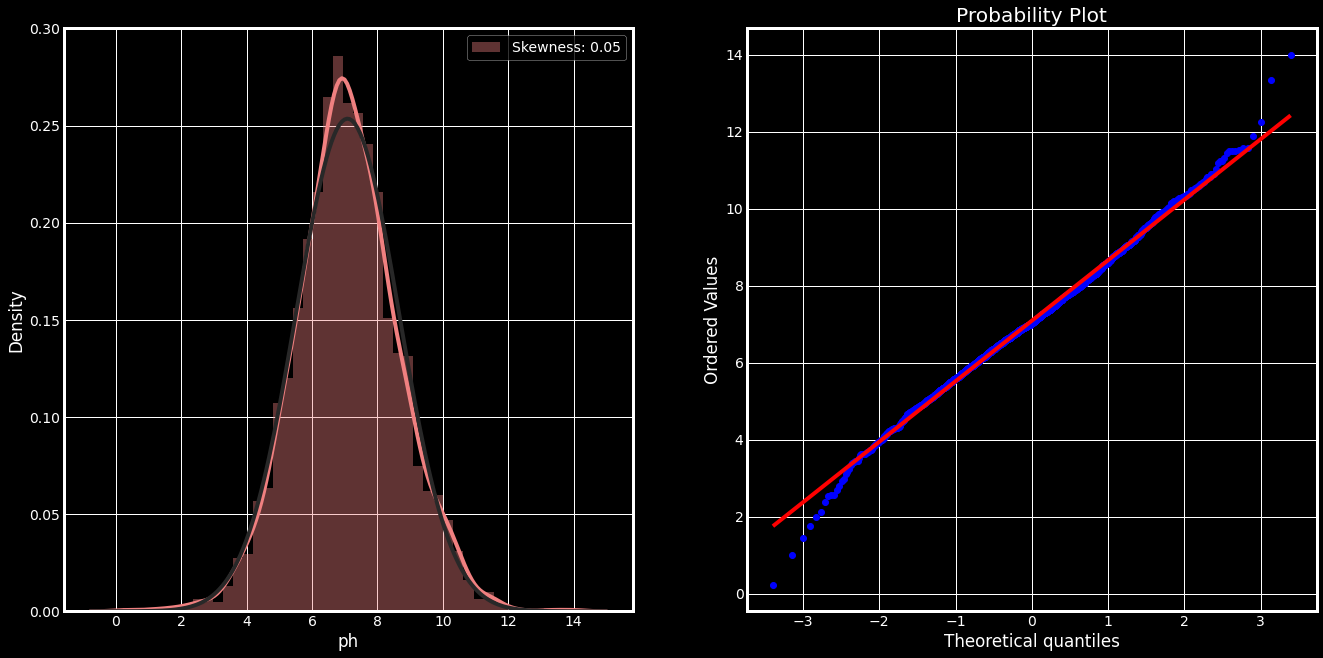

Skewness After Transformation for ph:  -1.1353215889866632 

Mean before Transformation for Ph : 2.069646135724062, Standard Deviation before Transformation for Ph : 0.20919355708751666 



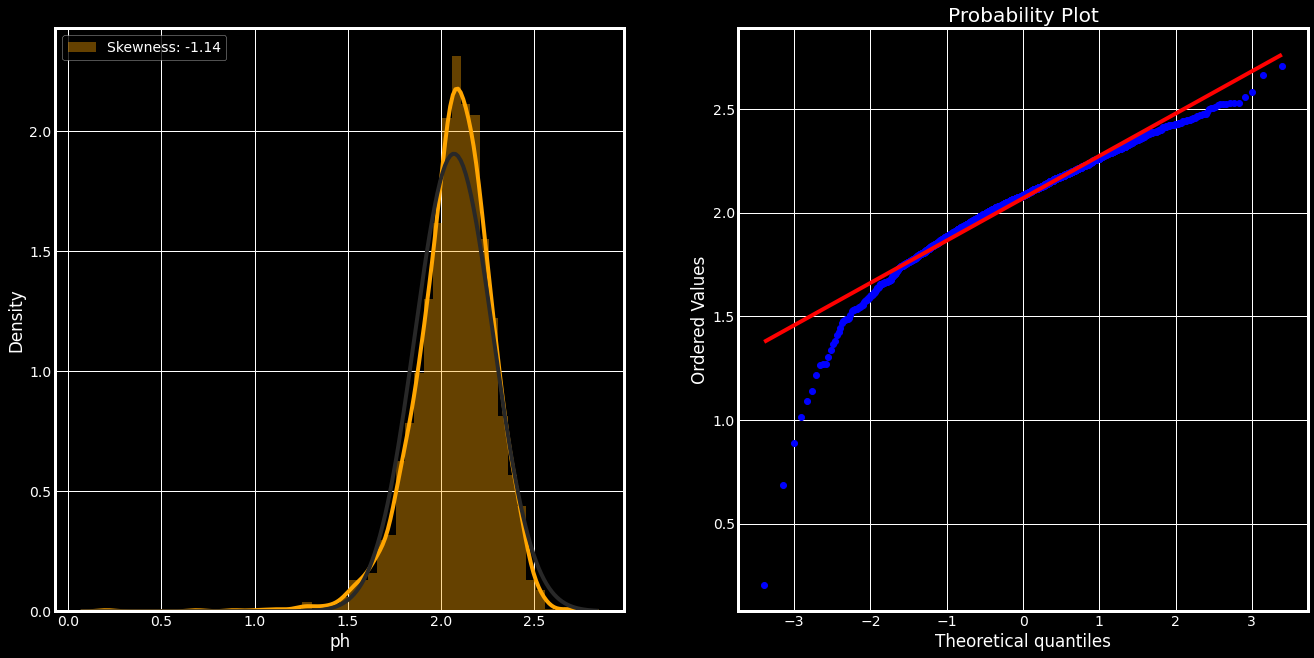

Skewness Before Transformation for Chloramines:  0.012976277458973277 

Mean before Transformation for Chloramines : 7.134338414511035, Standard Deviation before Transformation for Chloramines : 1.5844257944238938 



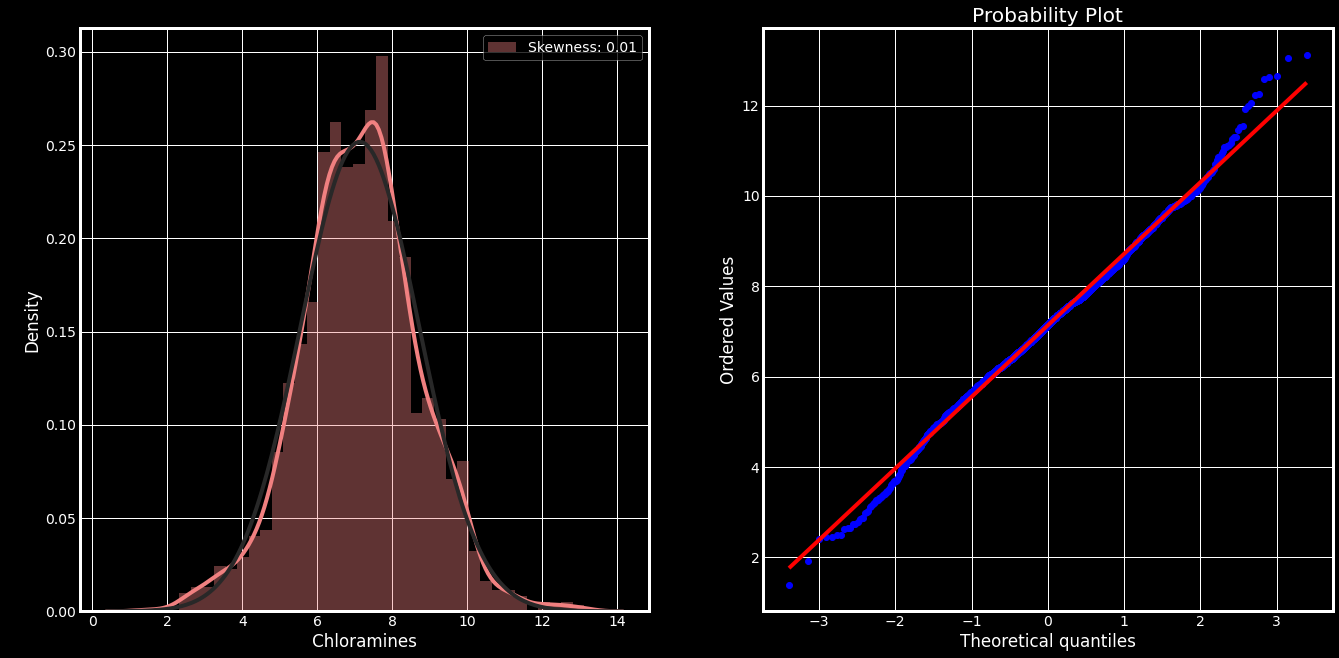

Skewness After Transformation for Chloramines:  -0.8633940049210872 

Mean before Transformation for Chloramines : 2.075660803668557, Standard Deviation before Transformation for Chloramines : 0.2077454472194916 



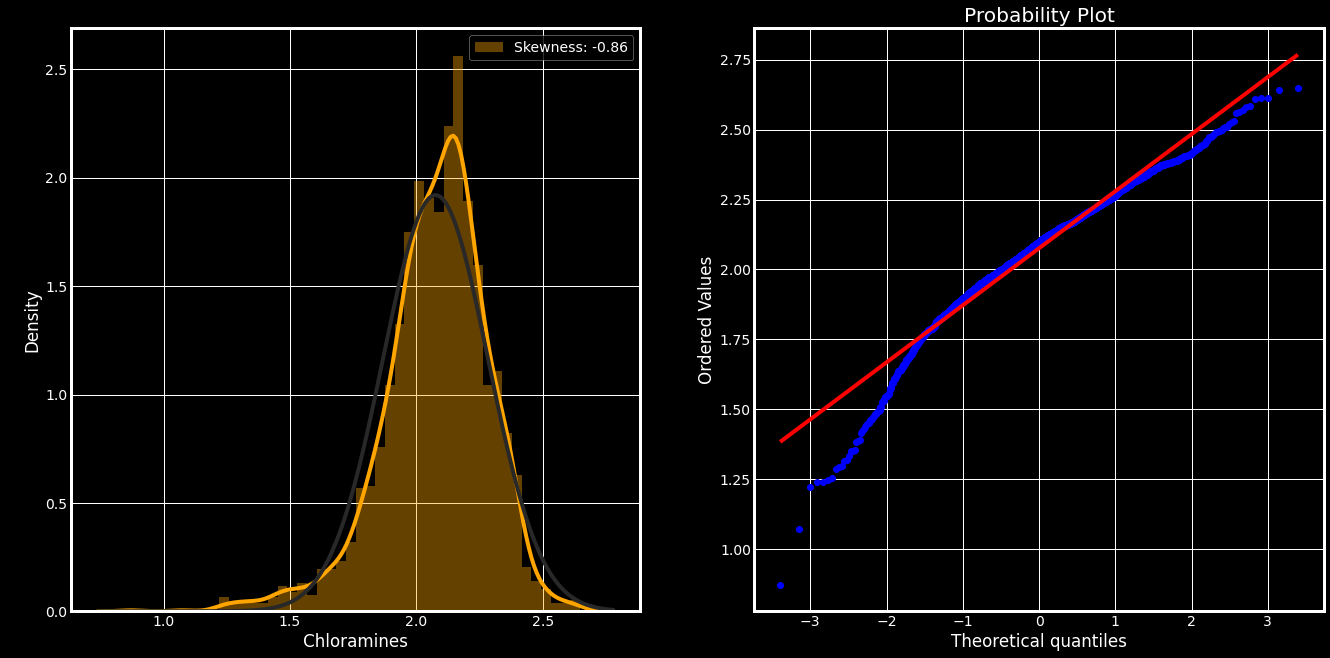

Skewness Before Transformation for Organic_carbon:  -0.020017660786145686 

Mean before Transformation for Organic_carbon : 14.357709409067539, Standard Deviation before Transformation for Organic_carbon : 3.3241318633200096 



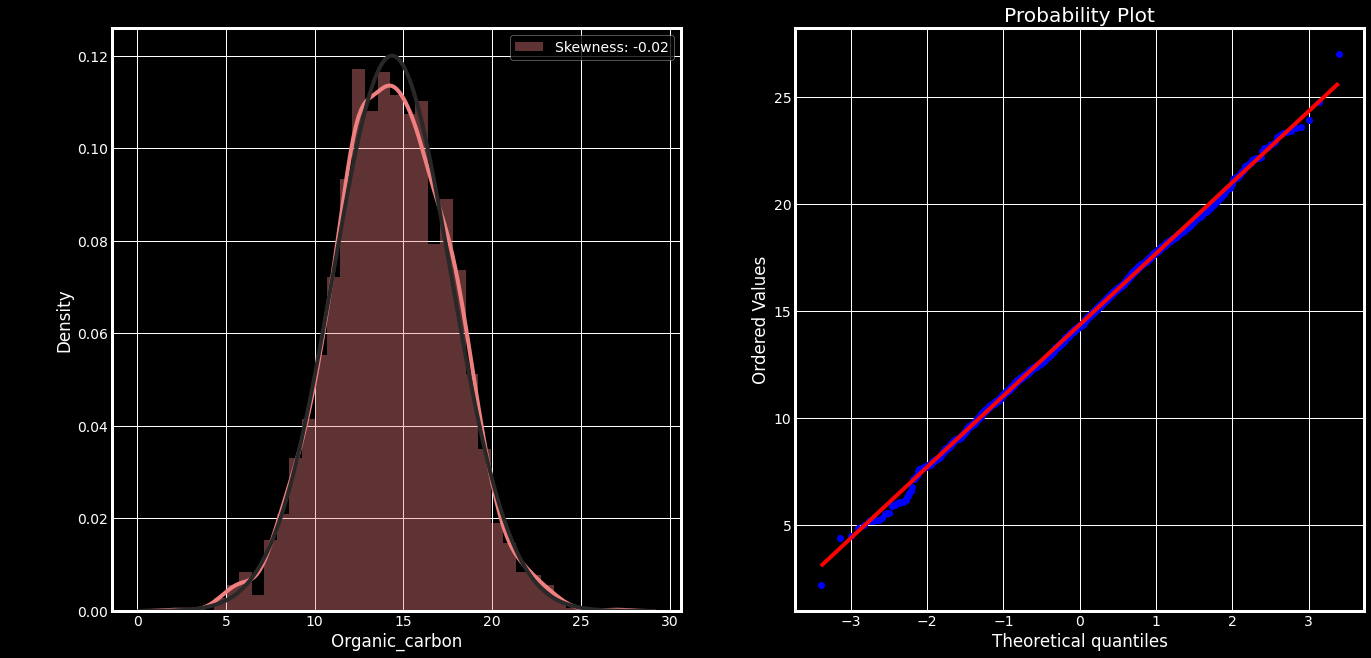

Skewness After Transformation for Organic_carbon:  -0.8735022417526352 

Mean before Transformation for Organic_carbon : 2.7060706485880073, Standard Deviation before Transformation for Organic_carbon : 0.23318171477866811 



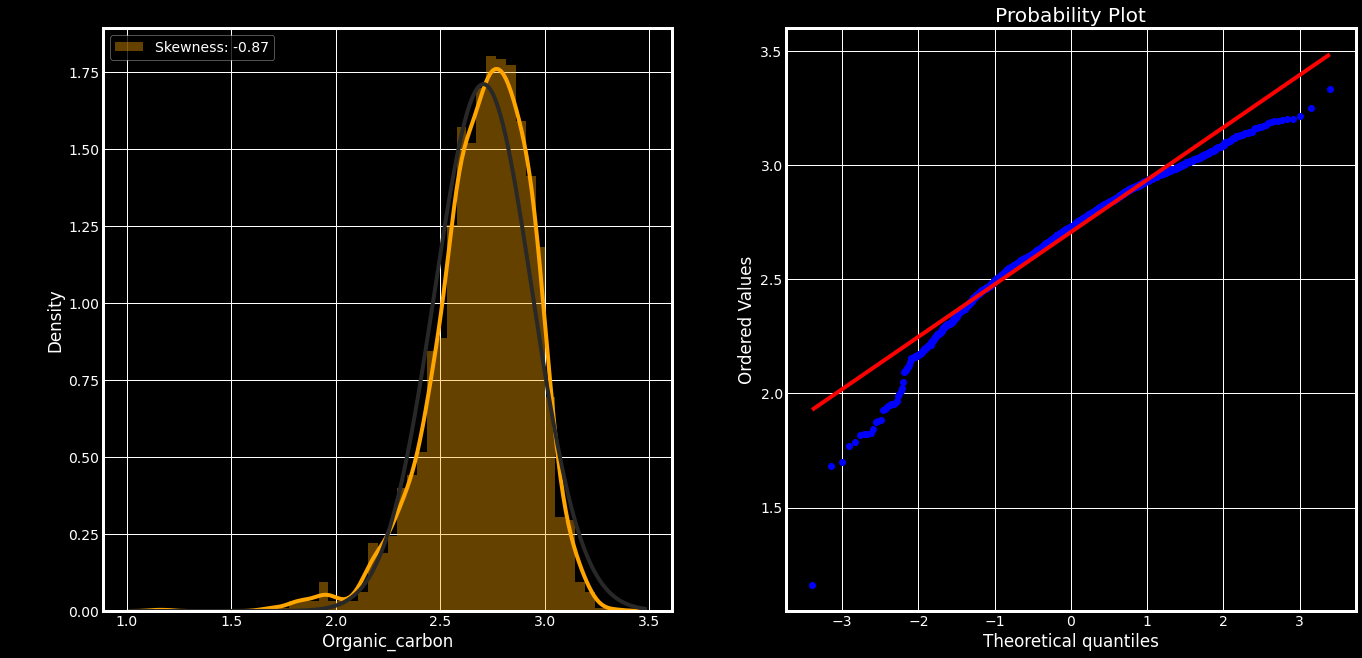

Skewness Before Transformation for Turbidity:  -0.03305148365834318 

Mean before Transformation for Turbidity : 3.9697287992523864, Standard Deviation before Transformation for Turbidity : 0.7801521151552843 



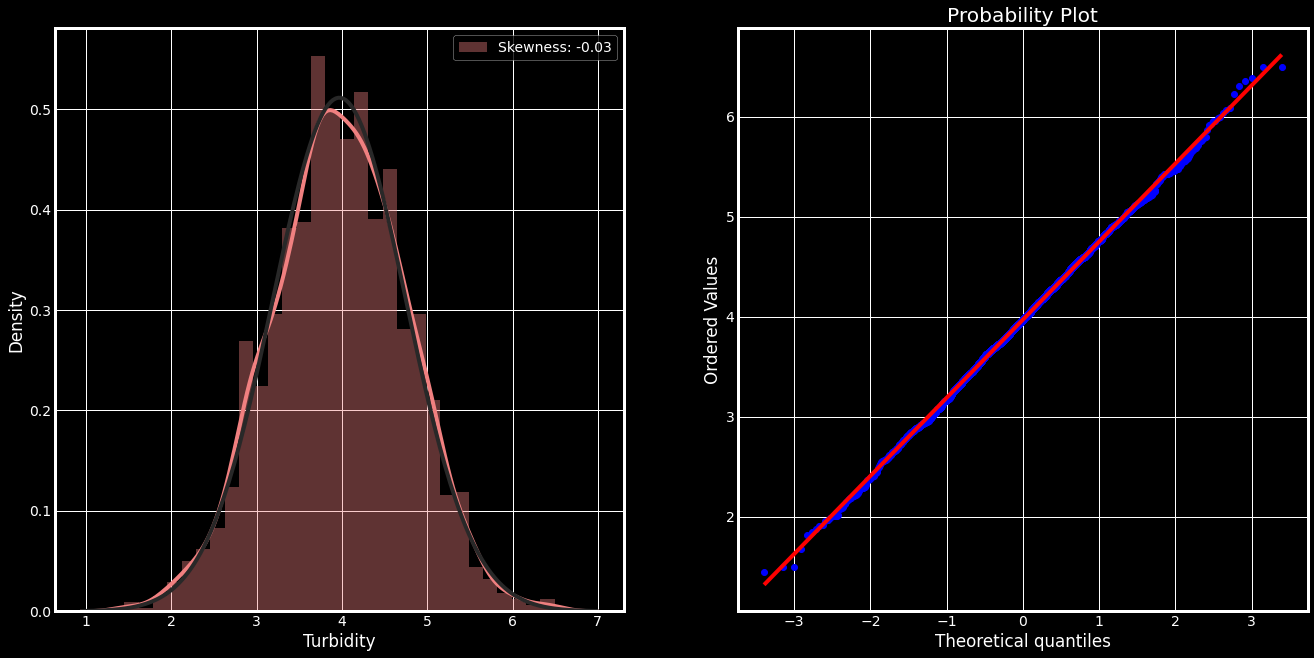

Skewness After Transformation for Turbidity:  -0.5344601027379543 

Mean before Transformation for Turbidity : 1.5905102577808692, Standard Deviation before Transformation for Turbidity : 0.1626252429452407 



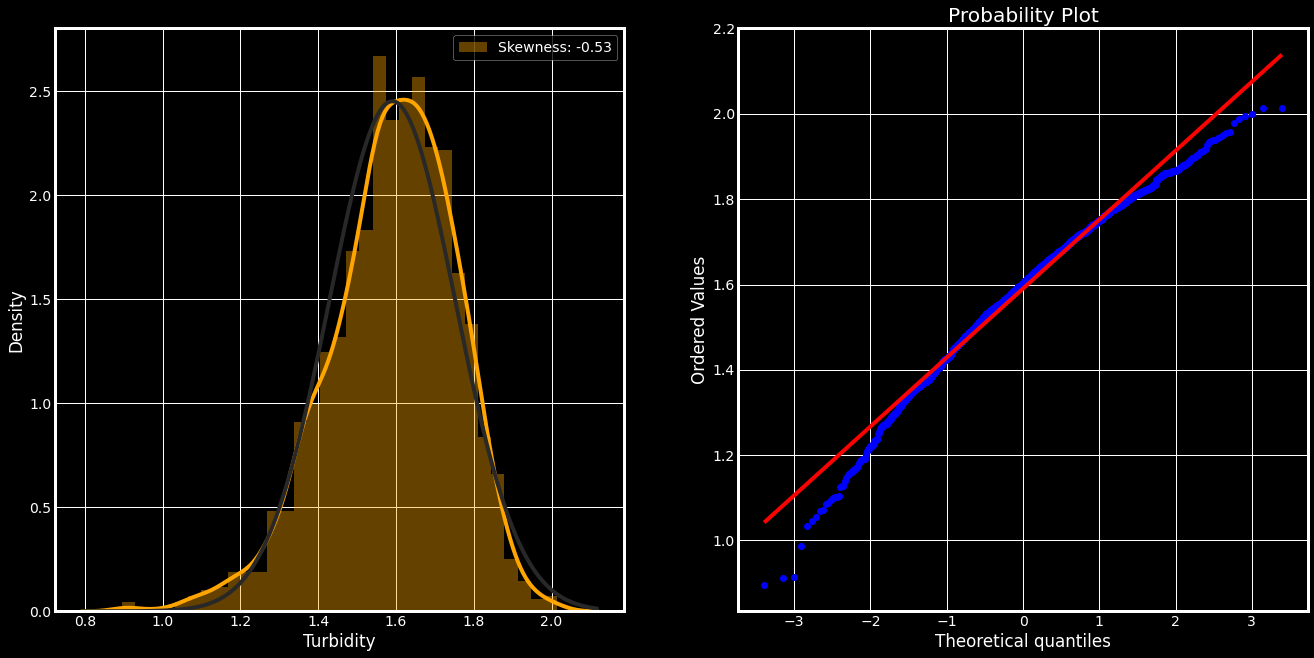

Skewness Before Transformation for Sulfate:  -0.04655769698842141 

Mean before Transformation for Sulfate : 333.22467188905864, Standard Deviation before Transformation for Sulfate : 41.194925817413676 



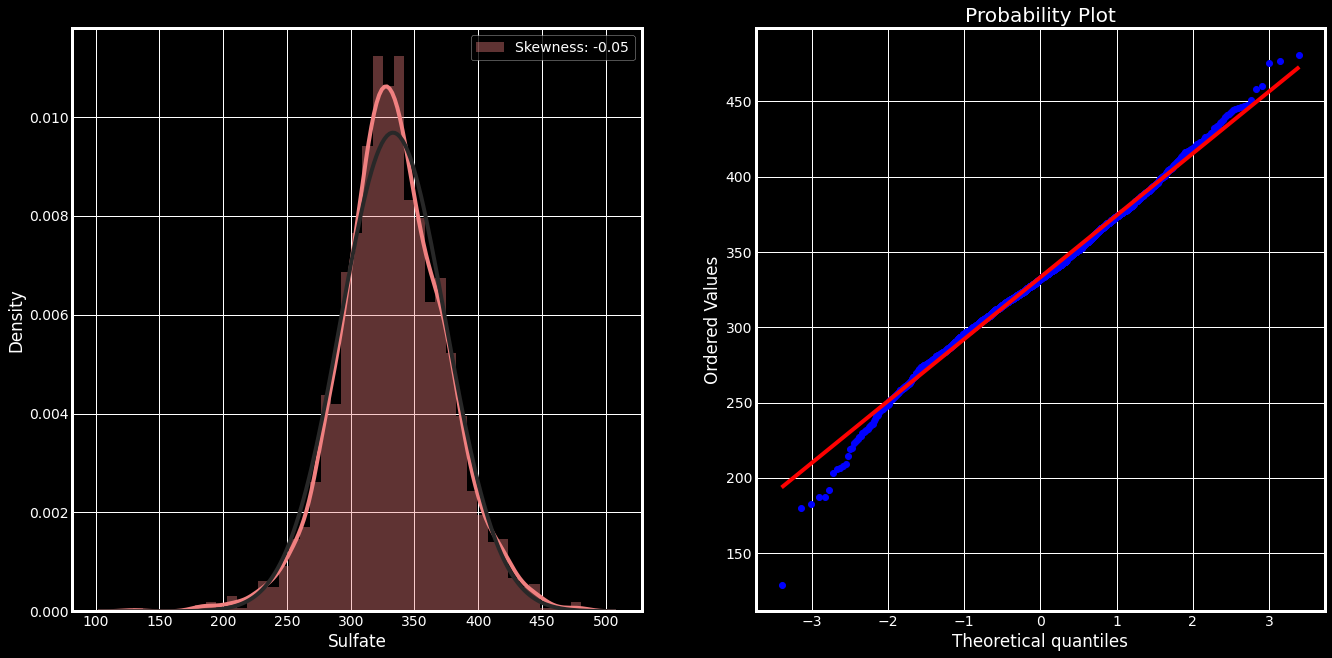

Skewness After Transformation for Sulfate:  -0.6904323262620179 

Mean before Transformation for Sulfate : 5.803934429028258, Standard Deviation before Transformation for Sulfate : 0.1272025102134412 



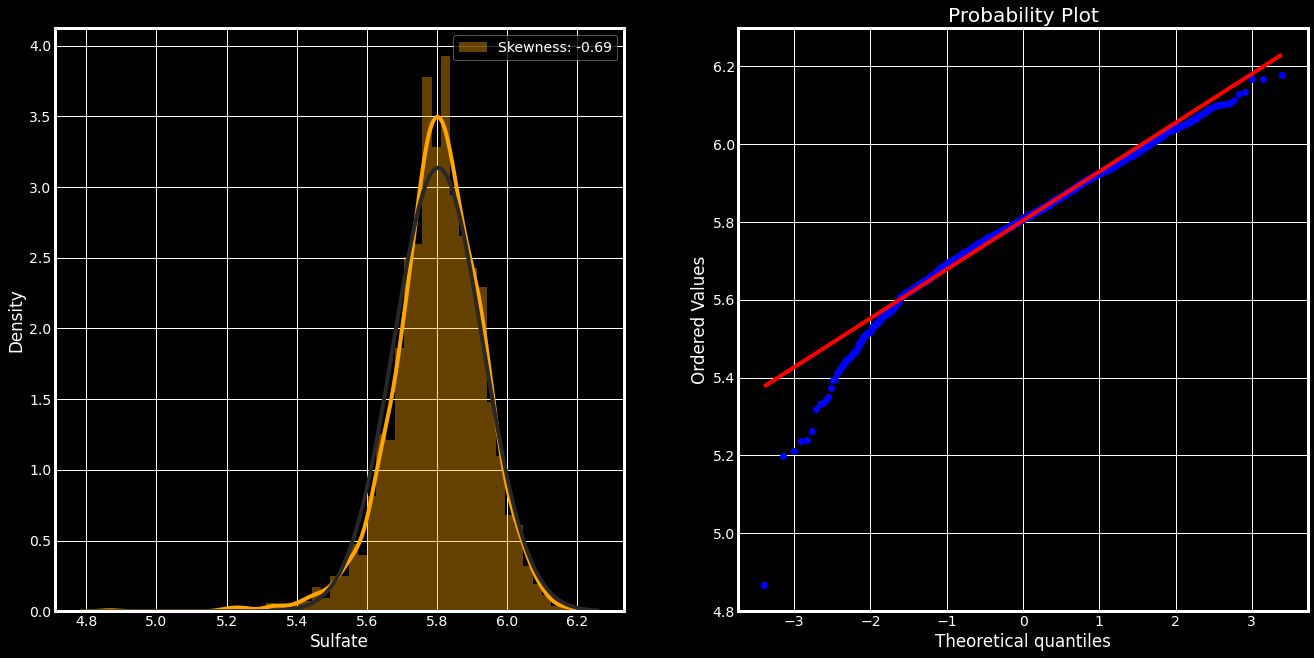

Skewness Before Transformation for Trihalomethanes:  -0.051422085759112335 

Mean before Transformation for Trihalomethanes : 66.4008593672628, Standard Deviation before Transformation for Trihalomethanes : 16.0731116931157 



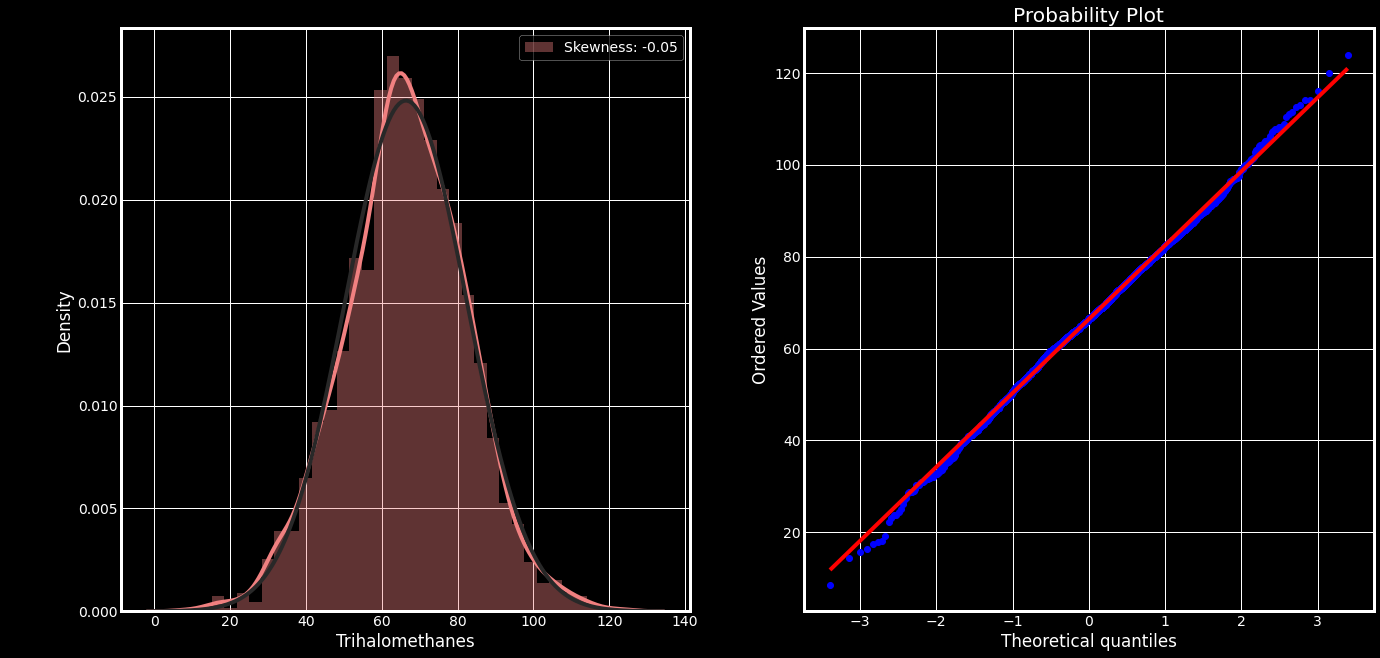

Skewness After Transformation for Trihalomethanes:  -1.1717469055146503 

Mean before Transformation for Trihalomethanes : 4.178489111806941, Standard Deviation before Transformation for Trihalomethanes : 0.265483190023941 



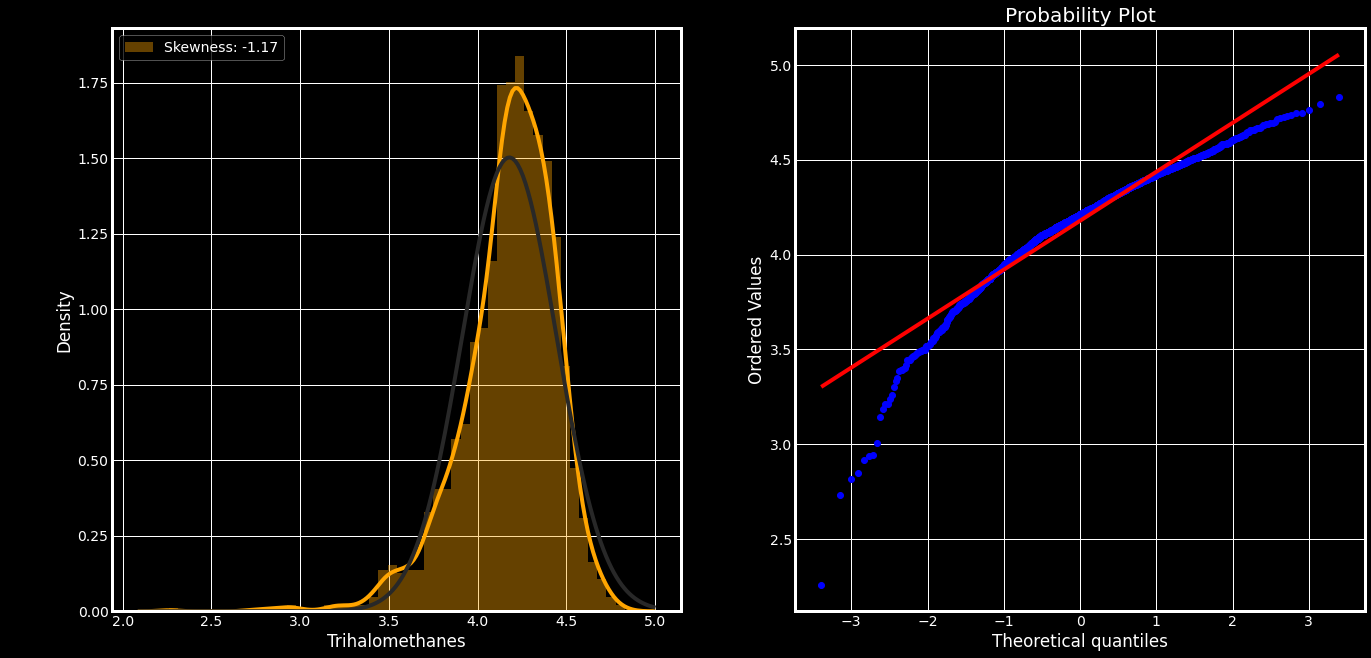

Skewness Before Transformation for Hardness:  -0.08523742258053375 

Mean before Transformation for Hardness : 195.9680715571974, Standard Deviation before Transformation for Hardness : 32.62696937081507 



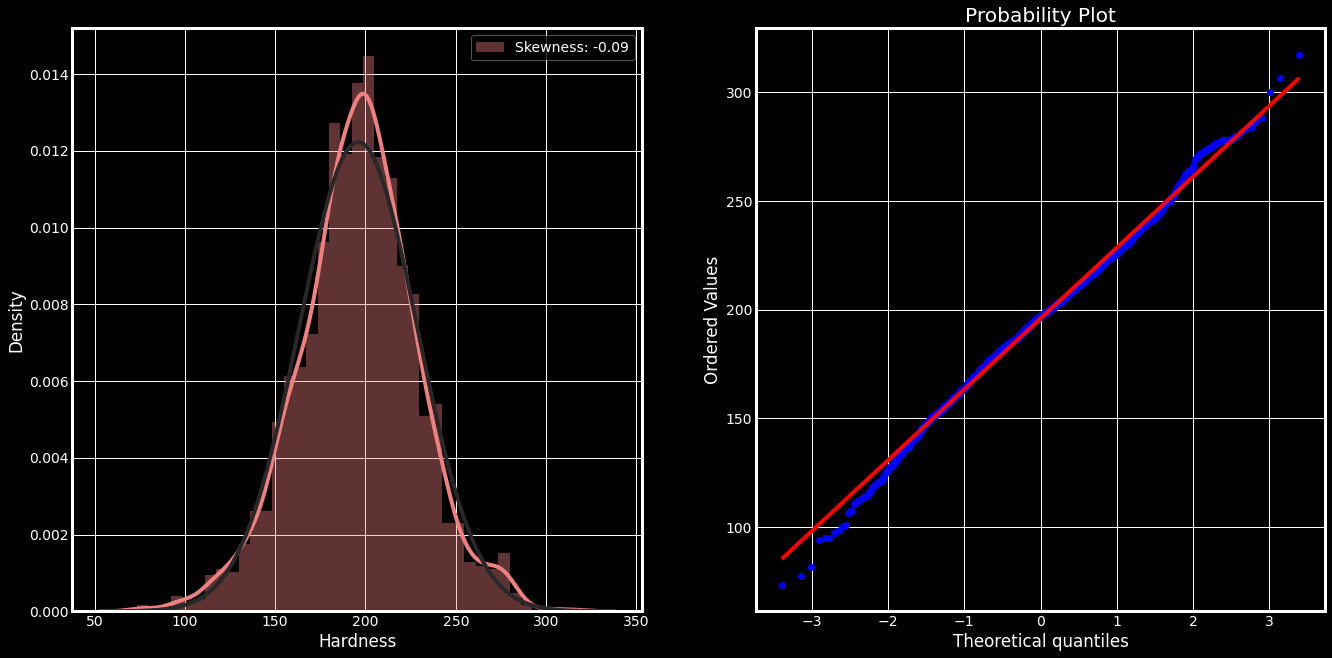

Skewness After Transformation for Hardness:  -0.8204384680215894 

Mean before Transformation for Hardness : 5.268413889542584, Standard Deviation before Transformation for Hardness : 0.17487336609382453 



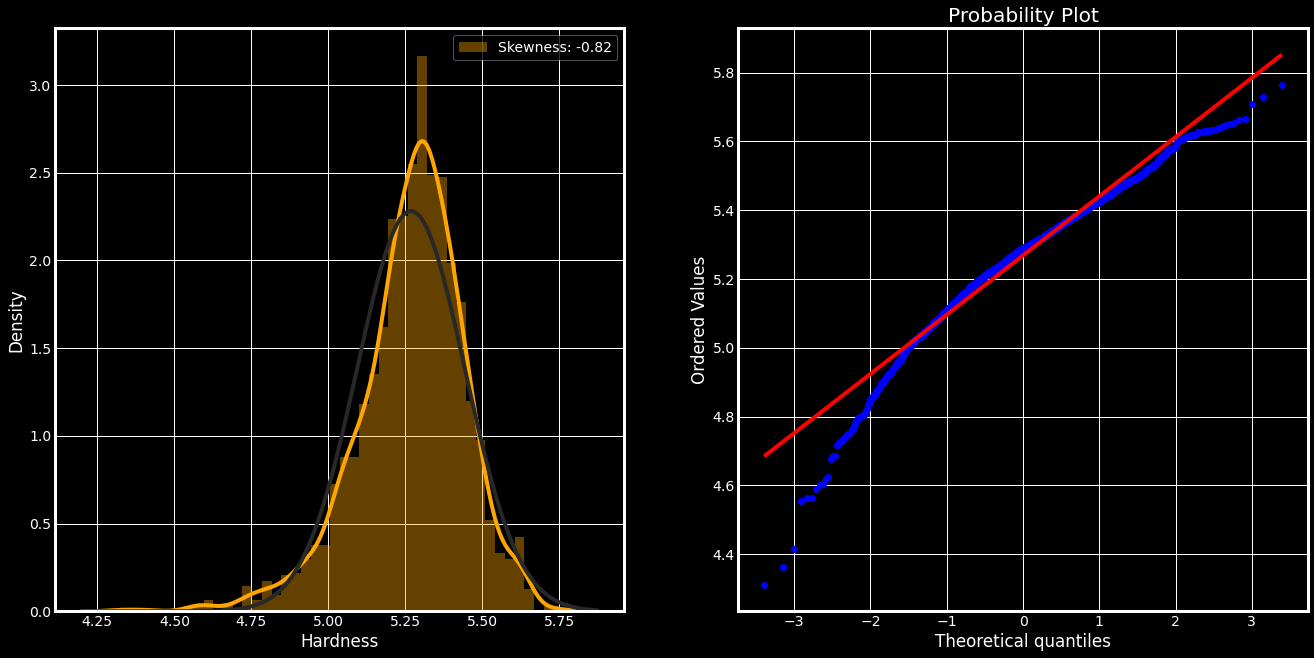

Elapsed Time:  10.060718774795532 seconds



In [19]:
 dataset = prep.skewcorrect(dataset,except_columns=['Potability'])

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h3 style="text-align:center;" >Above function's 
<a href="https://github.com/d4rk-lucif3r/EasifyML">Github Repo</a></h3>

</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Preparing Features and labels </h2>
</div>



In [20]:
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1]

In [21]:
features , labels

(            ph  Hardness     Solids  Chloramines   Sulfate  Conductivity  \
 3     2.231816  5.372373   9.999680     2.203795  5.880215      5.897886   
 4     2.311765  5.204564   9.797015     2.021097  5.740229      5.989990   
 5     1.884656  5.243403  10.266382     2.145331  5.792033      5.640018   
 6     2.418042  5.517741  10.266418     2.141642  5.978033      5.651266   
 7     2.265490  5.319891   9.523185     1.716139  5.718046      6.164593   
 ...        ...       ...        ...          ...       ...           ...   
 3267  2.301575  5.375498   9.675483     1.987506  5.749173      5.969756   
 3268  2.041551  5.339081   9.755447     2.164256  5.721983      5.799898   
 3269  2.525009  4.562394  10.523791     2.328561  5.560415      6.088804   
 3270  1.955806  5.234627  10.171214     2.168773  5.848461      6.032815   
 3271  1.734854  5.271366  10.770210     2.100057  5.888735      6.268005   
 
       Organic_carbon  Trihalomethanes  Turbidity  
 3           2.967154 

In [22]:
features.shape, labels.shape

((2011, 9), (2011,))



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Model Training</h1>
</div>




In [23]:
accuracy_scores =  {}



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Logistic Regression</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Logistic Regression on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]

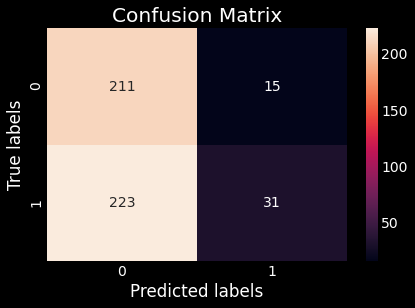

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5041666666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 52.60 %
Standard Deviation: 1.76 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.439208984375 seconds 



In [24]:
params = {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'newton-cg'}

classifier =  Classification(predictor = 'lr',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Stochastic Gradient Descent Classifier</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Stochastic Gradient Descent on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Ma

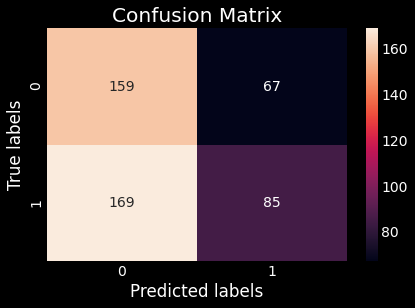

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5083333333333333
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 55.62 %
Standard Deviation: 2.29 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.34062838554382324 seconds 



In [25]:
params = {'alpha': 0.01, 'l1_ratio': 1.0, 'loss': 'hinge', 'penalty': 'l1'}

classifier =  Classification(predictor = 'sgd',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Perceptron</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Perceptron on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[166  6

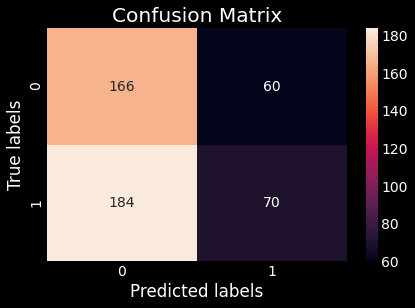

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.49166666666666664
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 49.95 %
Standard Deviation: 2.83 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.4527721405029297 seconds 



In [26]:
params = {'alpha': 0.00026366508987303583, 'l1_ratio': 0.21052631578947367, 'penalty': 'elasticnet'}

classifier =  Classification(predictor = 'perc',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Passive Agrressive Classifier</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Passive Aggressive on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]


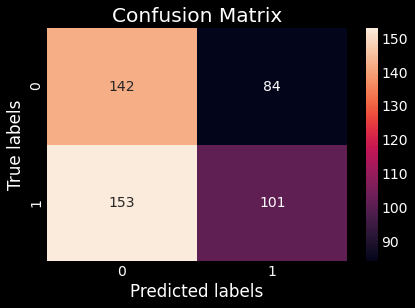

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.50625
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 53.85 %
Standard Deviation: 2.84 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.3416135311126709 seconds 



In [27]:
params = {'C': 0.0018329807108324356, 'loss': 'hinge', 'validation_fraction': 0.5}

classifier =  Classification(predictor = 'pass',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Ridge Classifier</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Ridge Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[

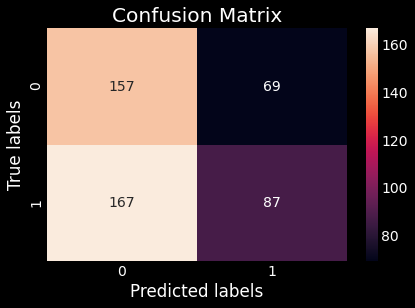

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5083333333333333
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 54.11 %
Standard Deviation: 1.37 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.39296603202819824 seconds 



In [28]:
params = {'alpha': 3792.690190732246}

classifier =  Classification(predictor = 'ridg',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Support Vector Machine</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Support Vector Machine on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix 

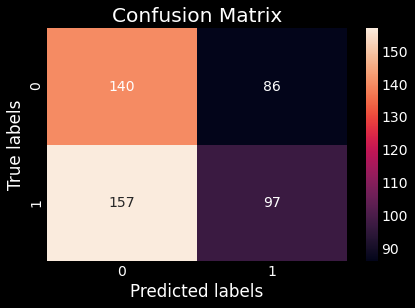

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.49375
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 53.28 %
Standard Deviation: 2.52 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  1.9067583084106445 seconds 



In [29]:
params = {'C': .75, 'gamma': 0.2,
          'kernel': 'linear', 'random_state': 42}
classifier =  Classification(predictor = 'svm',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training K-Nearest Neighnours</h2>
</div>







          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training K-Nearest Neighbours on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*

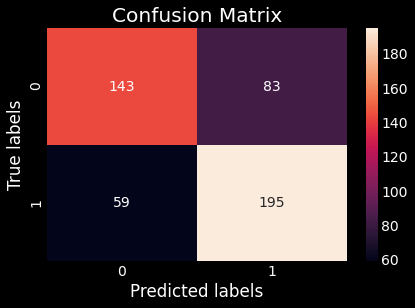

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7041666666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 73.23 %
Standard Deviation: 3.86 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.4502725601196289 seconds 



In [30]:
params = {'algorithm': 'kd_tree', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}
classifier =  Classification(predictor = 'knn',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Decision Trees</h2>
</div>




          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Decision Tree Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matri

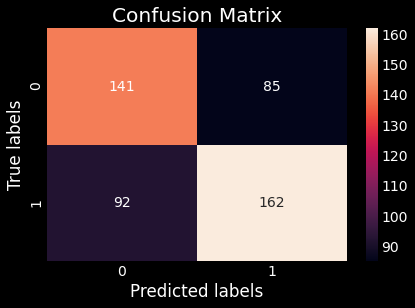

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.63125
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 65.16 %
Standard Deviation: 2.57 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.4442915916442871 seconds 



In [31]:
params = {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'splitter': 'best', 'random_state': 42}
classifier =  Classification(predictor = 'dt',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Gausian naive Bayes</h2>
</div>




          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Naive Bayes Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix 

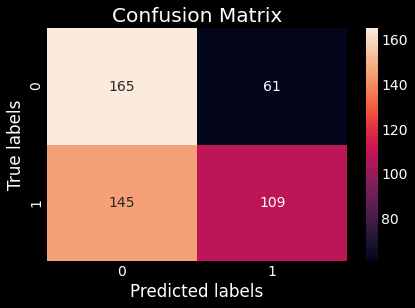

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5708333333333333
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 56.67 %
Standard Deviation: 3.19 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  0.3013448715209961 seconds 



In [32]:
classifier =  Classification(predictor = 'nb', smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Random Forest</h2>
</div>





          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Random Forest Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matri

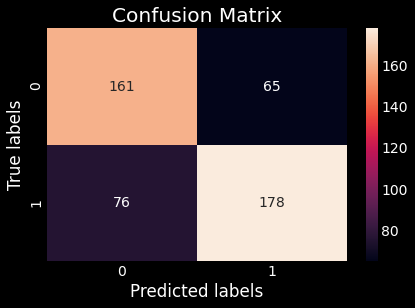

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.70625
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 72.45 %
Standard Deviation: 2.71 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  11.04525351524353 seconds 



In [33]:
params = {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150,'random_state':0}
classifier =  Classification(predictor = 'rfc',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Gradient Boosting Classifier</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Gradient Boosting Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion M

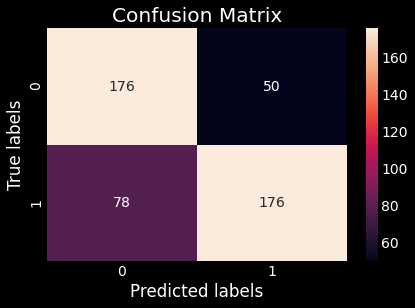

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7333333333333333
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 74.17 %
Standard Deviation: 0.97 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  103.23962664604187 seconds 



In [34]:
params = {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 70, 'max_features': 2, 'n_estimators': 300}

classifier =  Classification(predictor = 'gbc',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training AdaBoost Classifier</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training AdaBoost Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]

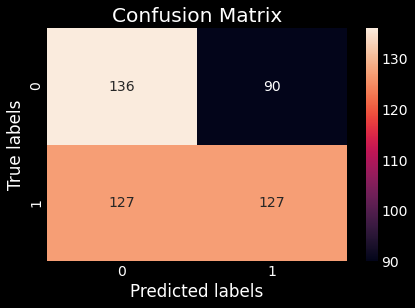

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.5479166666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 56.04 %
Standard Deviation: 3.63 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  14.96040964126587 seconds 



In [35]:
params = {'learning_rate': 0.1, 'n_estimators': 300}

classifier =  Classification(predictor = 'ada',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Bagging Classifier</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Bagging Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]


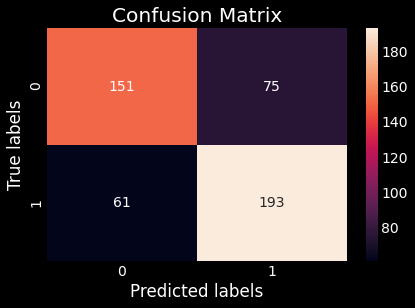

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7166666666666667
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 73.02 %
Standard Deviation: 3.01 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  23.196007013320923 seconds 



In [36]:
params = {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}

classifier =  Classification(predictor = 'bag',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Extra Trees Classifier</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Extra Trees Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix 

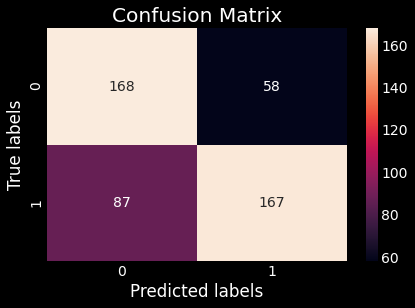

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6979166666666666
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 74.17 %
Standard Deviation: 2.76 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  26.73556399345398 seconds 



In [37]:
params = {'criterion': 'gini', 'max_depth': 40, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}

classifier =  Classification(predictor = 'extc',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Light Gradient Boosting Machine</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training LightGBM on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[145  81]

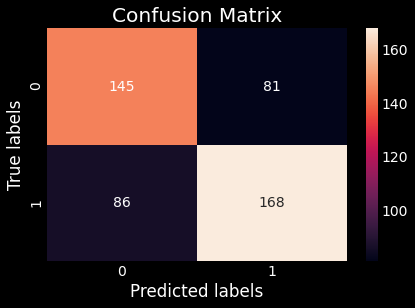

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6520833333333333
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 72.24 %
Standard Deviation: 1.44 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  7.874736309051514 seconds 



In [38]:
params = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000, 'num_leaves': 16}

classifier =  Classification(predictor = 'lgbm',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training CatBoost Classifier</h2>
</div>






          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training CatBoostClassifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]


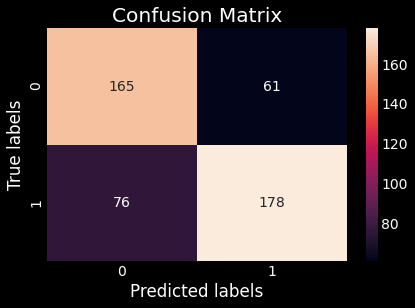

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7145833333333333
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 73.02 %
Standard Deviation: 2.74 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  45.81693124771118 seconds 



In [39]:
params = {'max_depth': 10, 'n_estimators': 200}

classifier =  Classification(predictor = 'cat',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training XGBoost Classifier</h2>
</div>




          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training XGBClassifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[153

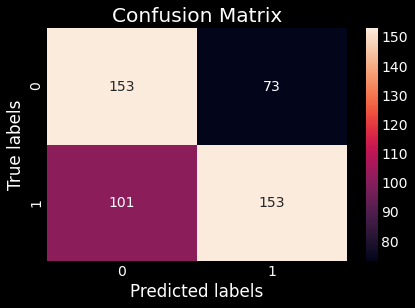

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.6375
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Accuracy: 69.64 %
Standard Deviation: 1.73 %
K-Fold Cross Validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  20.969685316085815 seconds 



In [40]:
params = {'learning_rate':0.02, 'n_estimators':600, 'objective':'binary:logistic', 'eval_metric':'logloss', 'nthread':-1}
classifier =  Classification(predictor = 'xgb',params=params, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training ANN</h2>
</div>




          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training ANN on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[140  86]
 [10

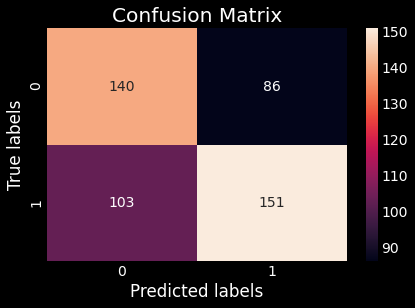

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.60625
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross Validation [*]
Epoch 1/300
70/70 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5117
Epoch 2/300
70/70 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5399
Epoch 3/300
70/70 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.5602
Epoch 4/300
70/70 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.6093
Epoch 5/300
70/70 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6068
Epoch 6/300
70/70 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.6123
Epoch 7/300
70/70 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.6148
Epoch 8/300
70/70 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6342
Epoch 9/300
70/70 [=====================

In [41]:
classifier =  Classification(predictor = 'ann',params=params, batch_size = 25, input_units = 15, epochs = 300, smote = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Finding which model performed better</h1>
</div>


In [42]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  Gradient Boosting Classifier with an accuracy of  74.17


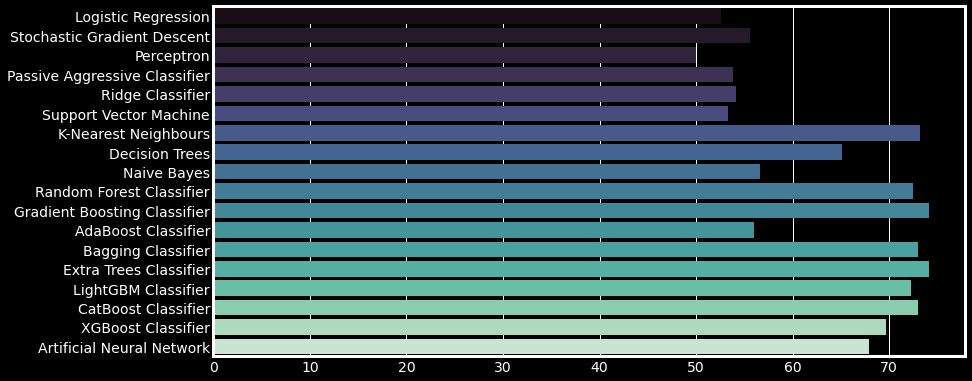

In [43]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = list(accuracy_scores.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='mako');



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Summary</h1>
<h2 style="text-align:center;">Extra Trees Classifier Performed Best</h2>
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1  style="text-align:center;font-weight: bold">
    <a href = "https://github.com/d4rk-lucif3r/LuciferML">LuciferML<a/>
        </h1>

</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Please give feedback by commenting below and If you liked my work please consider upvoting</h1>
</div>
